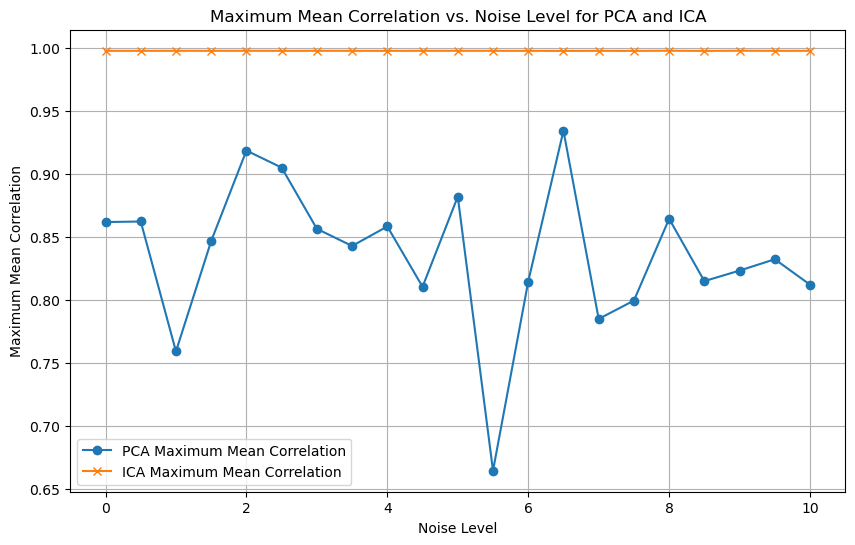

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.optimize import linear_sum_assignment

def generate_signals(t, noise_level):
    n = np.random.normal(0, 1, len(t))
    f1 = np.sin(t) + 0.001 * n * noise_level
    f2 = 2 * (t - np.floor(t)) + 0.002 * n * noise_level
    f3 = 0.01 * t + 0.001 * n * noise_level
    return np.vstack((f1, f2, f3))

# Function to measure correlation
def max_correlation(true, estimated):
    corr_matrix = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            corr_matrix[i, j] = abs(pearsonr(true[i], estimated[j])[0])
    
    # Optimale Zuordnung der Komponenten basierend auf maximaler Korrelation
    row_ind, col_ind = linear_sum_assignment(-corr_matrix)
    max_corr = [corr_matrix[row, col] for row, col in zip(row_ind, col_ind)]
    return max_corr

pca_correlations = []
ica_correlations = []
noise_levels = np.linspace(0, 10, 21)

for level in noise_levels:
    t = np.linspace(0, 100, 1000)
    A = np.random.rand(3, 3)
    f = generate_signals(t, level)
    x = A @ f
    x = x.T

    # PCA und ICA
    pca = PCA(n_components=3)
    ica = FastICA(n_components=3,whiten='unit-variance')

    # Fit and transform
    pca_transformed = pca.fit_transform(x).T
    ica_transformed = ica.fit_transform(x).T

    # Berechne maximale Korrelationen
    corr_pca = max_correlation(f, pca_transformed)
    corr_ica = max_correlation(f, ica_transformed)

    pca_correlations.append(np.mean(corr_pca))
    ica_correlations.append(np.mean(corr_ica))

plt.figure(figsize=(10, 6))
plt.plot(noise_levels, pca_correlations, label='PCA Maximum Mean Correlation', marker='o')
plt.plot(noise_levels, ica_correlations, label='ICA Maximum Mean Correlation', marker='x')

plt.xlabel('Noise Level')
plt.ylabel('Maximum Mean Correlation')
plt.title('Maximum Mean Correlation vs. Noise Level for PCA and ICA')
plt.legend()
plt.grid()
plt.show()
